In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import os

In [3]:
DATA_FOLDER = os.path.join("data", "BTCUSD")

In [5]:
df = pd.read_csv(os.path.join(DATA_FOLDER, "BCHAIN-MKPRU.csv"))

In [8]:
df = df.iloc[::-1]
df = df[df["Value"] > 0]
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)  

In [18]:
df

,Date,Value
4072,2010-08-16,0.0769
4070,2010-08-18,0.0688
4069,2010-08-19,0.0667
4068,2010-08-20,0.0700
4067,2010-08-21,0.0664
...,...,...
4,2021-10-05,49143.9500
3,2021-10-06,51505.8300
2,2021-10-07,55343.7600
1,2021-10-08,53801.1000


In [14]:
def func(x, a, b):
    return a + b * np.log(x)

In [24]:
xdata = np.arange(1, len(df["Value"]) + 1)
ydata = np.log(df["Value"])

popt, pcov = curve_fit(func, xdata, ydata, p0=[-15, 3])

(0.02, 600000.0)

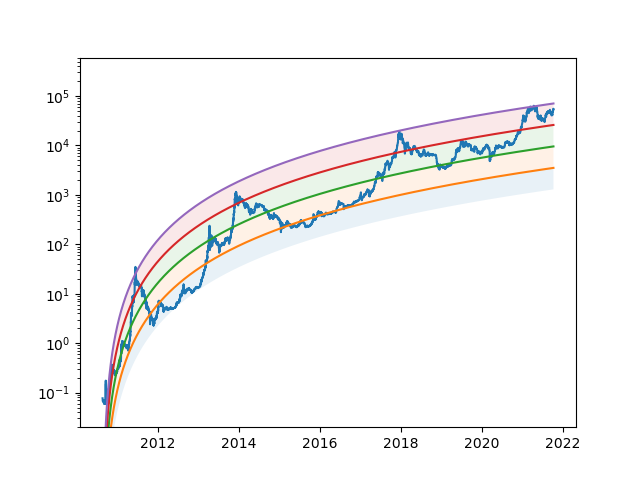

In [49]:
%matplotlib widget
fig, ax = plt.subplots()

ax.plot(df["Date"], df["Value"], "-")

for i in range(-1, 3):
    ax.plot(df["Date"], np.exp(func(xdata, *popt)+i))
    ax.fill_between(df["Date"], np.exp(func(xdata, *popt) + i - 1), np.exp(func(xdata, *popt) + i), alpha=0.1)
    
ax.set_yscale("log")
ax.set_ylim([0.02, 6e5])